<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumBasic_bqit_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import qiskit
qiskit.__version__

'1.0.2'

# Access to IBM Hardware

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

#Loading your IBM Quantum account(s)
# QiskitRuntimeService.save_account(channel="ibm_quantum",
#                                   token="MY API TOKEN")

service = QiskitRuntimeService(channel="ibm_quantum")

from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum")

In [ ]:
service.backends()

[<IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('ibm_brisbane')>]

## Qiskit submodules

- [Quantum Circuits](https://qiskit.org/documentation/apidoc/circuit.html) (`qiskit.circuit`)
- [Quantum Information](https://qiskit.org/documentation/apidoc/quantum_info.html) (`qiskit.quantum_info`)
- [Qiskit Aer (Simulator)](https://qiskit.github.io/qiskit-aer/apidocs/aer.html)
(`qiskit_aer`)
- [Visualization](https://qiskit.org/documentation/apidoc/visualization.html) (`qiskit.visualization`)
- [Primitives](https://qiskit.org/documentation/apidoc/primitives.html) (`qiskit.primitives`)

Other modules: https://docs.quantum.ibm.com/api/qiskit

Qiskit ecosystem: https://qiskit.github.io/ecosystem/

# Quantum Circuit


Here, we provide an overview of working with Qiskit.  The fundamental package of Qiskit is Terra that provides the basic building blocks necessary to program quantum computers. The fundamental unit of Qiskit is the [quantum circuit](https://en.wikipedia.org/wiki/Quantum_circuit). A basic workflow using Qiskit consists of two stages: **Build** and **Execute**. **Build** allows you to make different quantum circuits that represent the problem you are solving, and **Execute** that allows you to run them on different backends.  After the jobs have been run, the data is collected and postprocessed depending on the desired output.

## Build

Gates are matrices, applying gates is matrix multiplaction

Simplest example - the Bell State

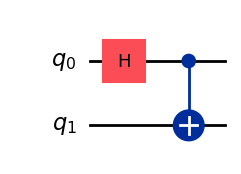

In [ ]:
from qiskit import QuantumCircuit

bell = QuantumCircuit(2)

bell.h(0)
bell.cx(0,1)

bell.draw('mpl')

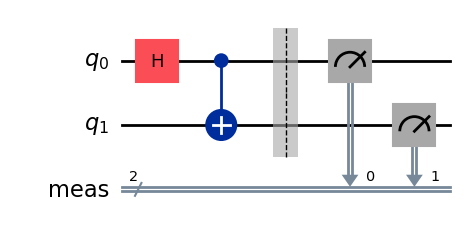

In [ ]:
bell_meas = bell.copy()
bell_meas.measure_all()
bell_meas.draw('mpl')

## Execute using Simulator

### 1. Aer backend: StatevectorSimulator

In [ ]:
from qiskit_aer import StatevectorSimulator

# StatevectorSimulator
simulator = StatevectorSimulator()

# Execute the circuit on the qasm simulator
job = simulator.run(bell)

# Grab results from the job
result = job.result()

# Returns a state vector
state_vec = result.get_statevector()

display(state_vec)
display(state_vec.draw('latex'))

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

### 2. Aer backend: QasmSimulator()

{'00': 478, '11': 546}


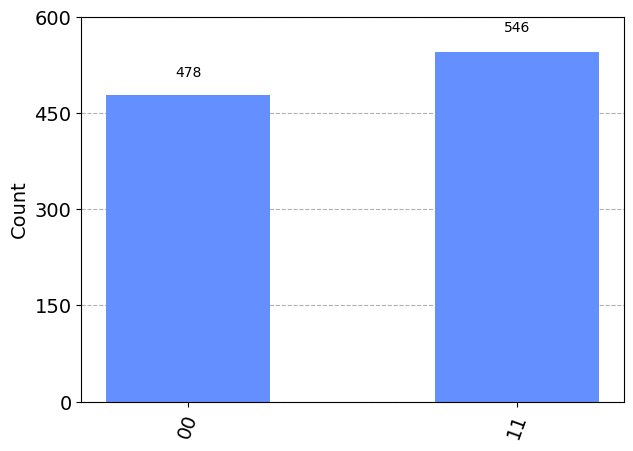

In [ ]:
from qiskit import transpile
from qiskit_aer import QasmSimulator
from qiskit.visualization import plot_histogram

# QasmSimulator
simulator = QasmSimulator()

# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(bell_meas, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1024)

# Grab results from the grab
result = job.result()

# Returns counts
counts = result.get_counts()

print(counts)
plot_histogram(counts)

### 3. Aer backend: UnitarySimulator

In [ ]:
from qiskit_aer import UnitarySimulator

# UnitarySimulator
simulator = UnitarySimulator()

# Execute the circuit on the qasm simulator
job = simulator.run(bell)

# Grab results from the grab
result = job.result()

# Returns counts
operator = result.get_unitary()

# Draw the histogram
operator.draw('latex')

<IPython.core.display.Latex object>

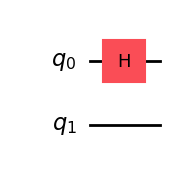

<IPython.core.display.Latex object>

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
display(qc.draw('mpl'))
operator = simulator.run(qc).result().get_unitary()
operator.draw('latex')

$H \otimes I$ or $I \otimes H$? // Big Endian or Little Endian?

$I \otimes H = \begin{bmatrix} 1&0 \\ 0&1 \end{bmatrix} \otimes \dfrac{1}{\sqrt{2}}\begin{bmatrix} 1&1 \\ 1&-1 \end{bmatrix} = \dfrac{1}{\sqrt{2}} \begin{bmatrix} 1\begin{pmatrix} 1&1 \\ 1&-1 \end{pmatrix}&0\begin{pmatrix} 1&1 \\ 1&-1 \end{pmatrix} \\ 0\begin{pmatrix} 1&1 \\ 1&-1 \end{pmatrix}&1\begin{pmatrix} 1&1 \\ 1&-1 \end{pmatrix} \end{bmatrix}$

**Little Endian!**

### GHZ state

As you proceed through the tutorials you will find more gates and circuits; below is an example of a quantum circuit that makes a three-qubit GHZ state

$$|\psi\rangle = \left(|000\rangle+|111\rangle\right)/\sqrt{2}.$$

To create such a state, we start with a three-qubit quantum register. By default, each qubit in the register is initialized to $|0\rangle$. To make the GHZ state, we apply the following gates:
- A Hadamard gate $H$ on qubit 0, which puts it into the superposition state $\left(|0\rangle+|1\rangle\right)/\sqrt{2}$.
- A controlled-Not operation ($C_{X}$) between qubit 0 and qubit 1.
- A controlled-Not operation between qubit 0 and qubit 2.

On an ideal quantum computer, the state produced by running this circuit would be the GHZ state above.

In Qiskit, operations can be added to the circuit one by one, as shown below.

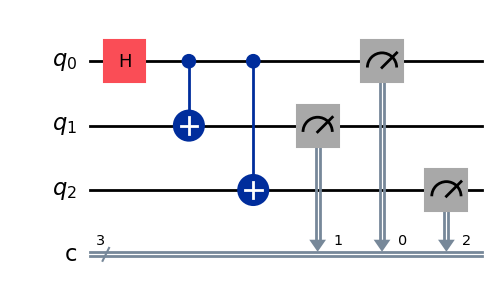

In [ ]:
# Exercise: Recreate the circuit as shown above.
ghz = QuantumCircuit(3,3)
# Add a H gate on qubit 0, putting this qubit in superposition.
ghz.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
ghz.cx(0,1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
ghz.cx(0,2)
# Measure qubits
ghz.measure([0,1,2],[0,1,2])


# Draw the circuit
ghz.draw('mpl')


Total count for 000 and 111 are: {'000': 526, '111': 498}


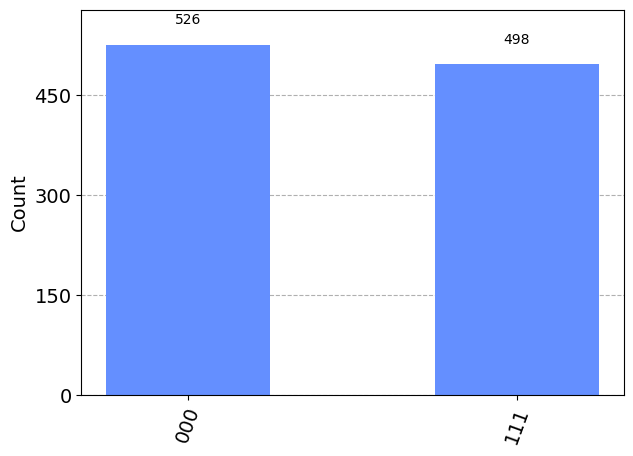

In [ ]:
simulator = QasmSimulator()
compiled_circuit = transpile(ghz, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1024)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 000 and 111 are:", counts)

# Draw the histogram
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## Execute using Real Hardware

### Fake Real Backend

In [ ]:
# Define a local backend
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit.visualization import plot_error_map
backend = FakeManilaV2()

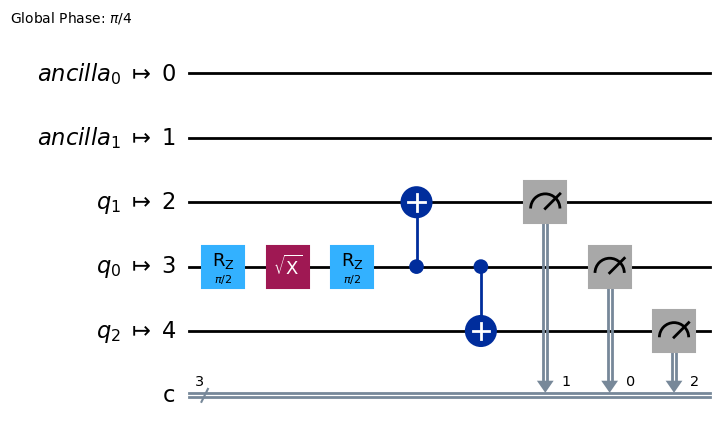

In [ ]:
ghz_circuit = transpile(ghz, backend)
ghz_circuit.draw('mpl')

In [ ]:
job = backend.run(ghz_circuit)

In [ ]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

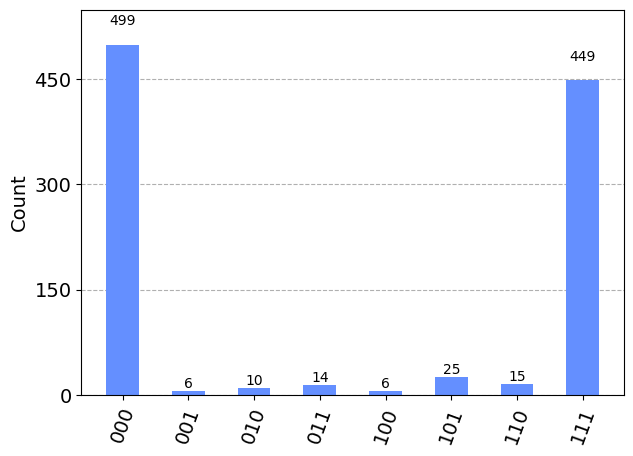

In [ ]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### Real Backend

In [ ]:
from dataclasses import asdict
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=3)

In [ ]:
backend

<IBMBackend('ibm_sherbrooke')>

In [ ]:
sampler = Sampler(backend, options={"default_shots": 1024})

# Setting options after primitive initialization
# This uses auto complete.
sampler.options.dynamical_decoupling.enable = True
# Turn on gate twirling. Requires qiskit_ibm_runtime 0.23.0 or later.
sampler.options.twirling.enable_gates = True

# This does bulk update.  The value for default_shots is overridden if you specify shots with run() or in the PUB.
sampler.options.update(default_shots=1024, dynamical_decoupling={"sequence_type": "XpXm"})

# Print the dictionary format.
# Server defaults are used for unset options.
print(asdict(sampler.options))

{'_VERSION': 2, 'max_execution_time': Unset, 'environment': {'log_level': 'WARNING', 'callback': None, 'job_tags': None}, 'simulator': {'noise_model': Unset, 'seed_simulator': Unset, 'coupling_map': Unset, 'basis_gates': Unset}, 'default_shots': 1024, 'dynamical_decoupling': {'enable': True, 'sequence_type': 'XpXm', 'extra_slack_distribution': Unset, 'scheduling_method': Unset}, 'execution': {'init_qubits': Unset, 'rep_delay': Unset, 'meas_type': Unset}, 'twirling': {'enable_gates': True, 'enable_measure': Unset, 'num_randomizations': Unset, 'shots_per_randomization': Unset, 'strategy': Unset}, 'experimental': Unset}


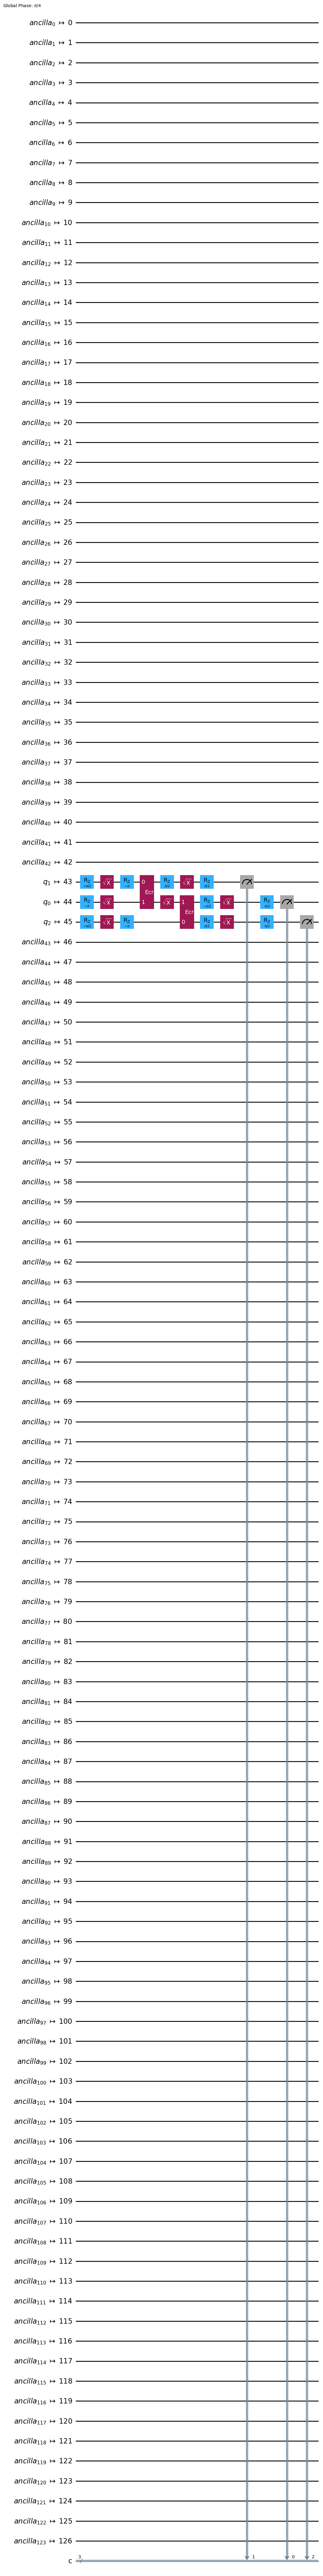

In [ ]:
ghz_circuit = transpile(ghz, backend)
ghz_circuit.draw('mpl')

In [ ]:
job = sampler.run([ghz_circuit], shots=1024)

In [ ]:
# check if a job is still running
print(f"Job {job.job_id()} is still running: {job.status() == "RUNNING"}")

Job cs10b95bqt7g0081vj8g is still running: False


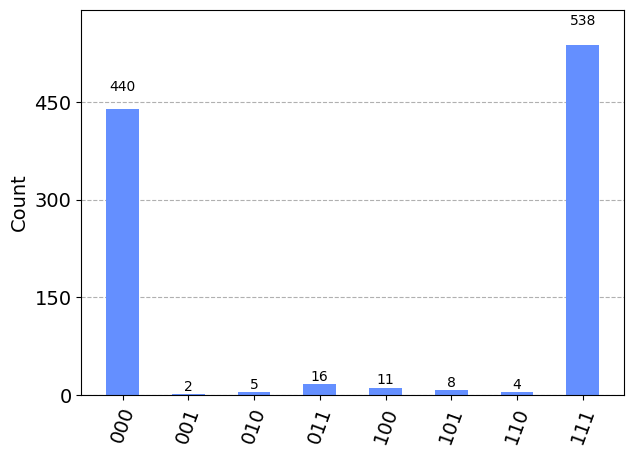

In [ ]:
result = job.result()
counts = result[0].data.c.get_counts()
plot_histogram(counts)

---

# Qubit

In [ ]:
from qiskit.quantum_info import Statevector
from qiskit.visualization.array import array_to_latex

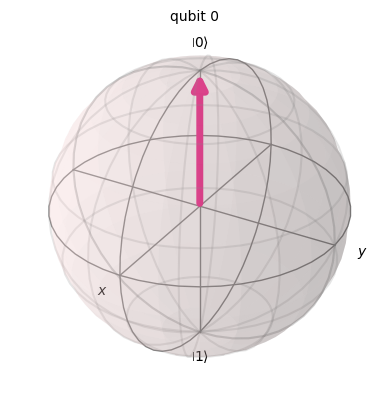

In [ ]:
qc = QuantumCircuit(1)
Statevector(qc).draw('bloch')

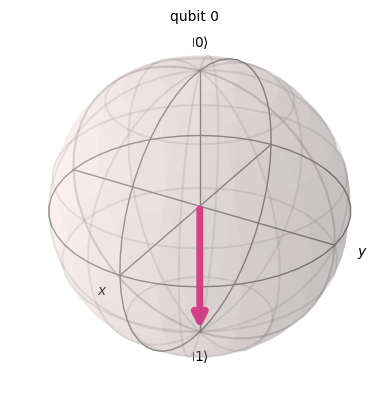

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
Statevector(qc).draw('bloch')

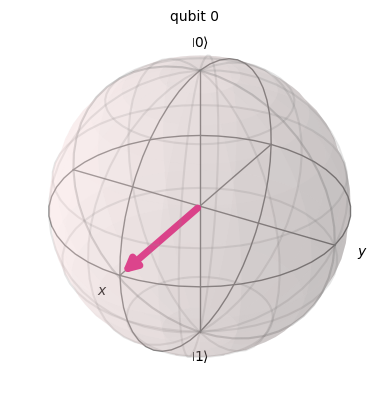

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
Statevector(qc).draw('bloch')

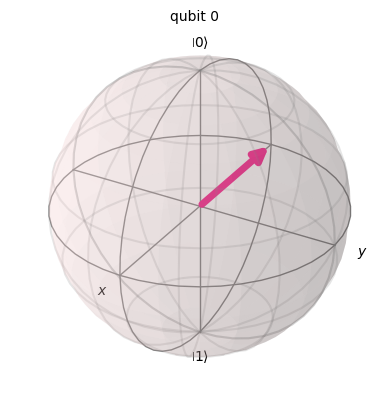

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
Statevector(qc).draw('bloch')

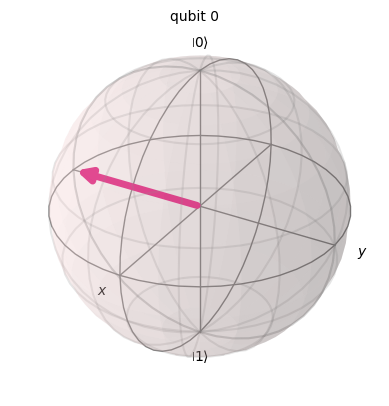

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.s(0)
Statevector(qc).draw('bloch')

---

# Qiskit Runtime Primitives: Sampler & Estimator

Let me introduce two elements proposed by IBM. More primitives may be added to make it more efficient to develop algorithms, but two are currently being developed and distributed-Sampler and Estimator

One of the key features of quantum computers that distinguish them from classical computers is that they can get non-classcial probability distributions by measuring results. This means that the same circuit must be run multiple times on the quantum backend to get the desired result, and the result must be estimated using the obtained probability distribution. In other words, two things are important in utilizing quantum computing: **1) Sampling the probability distribution** and **2) Estimating the value** from which two primitives **Sampler**s and **Estimator**s, which are faithful to their respective functions, were born.

## Estimator Example

$$|\Phi^{+}\rangle = \dfrac{1}{\sqrt{2}}(|0\rangle|0\rangle + |1\rangle|1\rangle)$$

Expectation value : $\langle \hat{H} \rangle_\psi = \langle \psi | \hat{H} |\psi \rangle$

Let's calculate the expectation value for $|\psi \rangle=|\Phi^+ \rangle$, $\hat{H} = ZI,\, IZ,\, ZZ,\, XI,\, IX,\, XX$

$$\begin{align*}\langle \Phi^{+} | ZI |\Phi^{+}\rangle &= \dfrac{1}{2}(\langle0|\langle0| + \langle1|\langle1|) \; ZI \; (|0\rangle|0\rangle + |1\rangle|1\rangle) \\ &= \dfrac{1}{2}(\langle0|\langle0| + \langle1|\langle1|) (|0\rangle|0\rangle - |1\rangle|1\rangle) \\ &= 0 \\
\langle \Phi^{+} | IZ |\Phi^{+}\rangle &= \dfrac{1}{2}(\langle0|\langle0| + \langle1|\langle1|) \; IZ \; (|0\rangle|0\rangle + |1\rangle|1\rangle) \\ &= \dfrac{1}{2}(\langle0|\langle0| + \langle1|\langle1|) (|0\rangle|0\rangle - |1\rangle|1\rangle) \\ &= 0 \\
\langle \Phi^{+} | ZZ |\Phi^{+}\rangle &= \dfrac{1}{2}(\langle0|\langle0| + \langle1|\langle1|) \; ZZ \; (|0\rangle|0\rangle + |1\rangle|1\rangle) \\ &= \dfrac{1}{2}(\langle0|\langle0| + \langle1|\langle1|) (|0\rangle|0\rangle + |1\rangle|1\rangle) \\ &= 1\end{align*}$$

$$\begin{align*}\langle \Phi^{+} | XI |\Phi^{+}\rangle &= \dfrac{1}{2}(\langle0|\langle0| + \langle1|\langle1|) \; XI \; (|0\rangle|0\rangle + |1\rangle|1\rangle) \\ &= \dfrac{1}{2}(\langle0|\langle0| + \langle1|\langle1|) (|1\rangle|0\rangle + |0\rangle|1\rangle) \\ &= 0 \\
\langle \Phi^{+} | IX |\Phi^{+}\rangle &= \dfrac{1}{2}(\langle0|\langle0| + \langle1|\langle1|) \; IX \; (|0\rangle|0\rangle + |1\rangle|1\rangle) \\ &= \dfrac{1}{2}(\langle0|\langle0| + \langle1|\langle1|) (|0\rangle|1\rangle + |1\rangle|0\rangle) \\ &= 0 \\
\langle \Phi^{+} | XX |\Phi^{+}\rangle &= \dfrac{1}{2}(\langle0|\langle0| + \langle1|\langle1|) \; XX \; (|0\rangle|0\rangle + |1\rangle|1\rangle) \\ &= \dfrac{1}{2}(\langle0|\langle0| + \langle1|\langle1|) (|1\rangle|1\rangle + |0\rangle|0\rangle) \\ &= 1\end{align*}$$

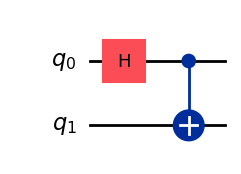

In [ ]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)

qc.draw(output='mpl')

In [ ]:
from qiskit.quantum_info import Pauli

ZI = Pauli('ZI')
IZ = Pauli('IZ')
ZZ = Pauli('ZZ')
XI = Pauli('XI')
IX = Pauli('IX')
XX = Pauli('XX')

observables = [ZI, IZ, ZZ, XI, IX, XX]

In [ ]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()

job = estimator.run([qc] * len(observables), observables, shots=10000)

job.result()

EstimatorResult(values=array([0.007 , 0.007 , 1.    , 0.0012, 0.0012, 1.    ]), metadata=[{'shots': 10000, 'variance': 0.999951, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0307046, 'sample_measure_time': 0.0115235, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 7421, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 16, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 10000, 'variance': 0.999951, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0307046, 'sample_measure_time': 0.0115235, 'input_qubit_map': [[0, 0], [1, 1]],

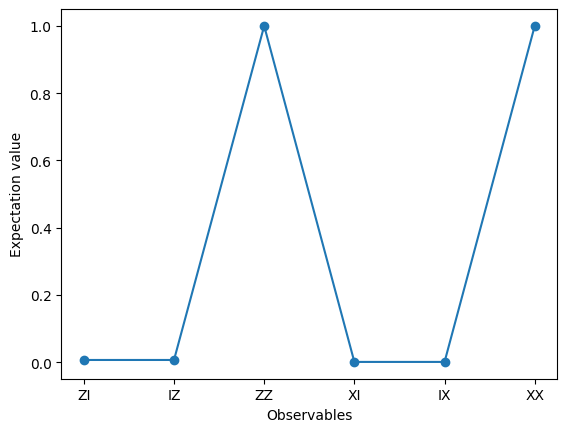

In [ ]:
import matplotlib.pyplot as plt

data = ['ZI', 'IZ', 'ZZ', 'XI', 'IX', 'XX']
values = job.result().values

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation value')
plt.show()